## Conclusion

Using softmax to predict multiple label output also using spare_categorical_crossentropy as loss with multi-label output. I observed that using adadelta as optimizer gave me maximum efficiency
and some spikes were also seen which means high deviation fo data which somewhere effected the fficiency of the model. and i have worked one all model one by one by changeing the activation,optimizer and all.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('/content/Crystal_structure.csv')


In [3]:
data

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,cubic
5325,ZrYO3,Zr,Y,False,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-,0.642857,cubic
5326,ZrYbO3,Zr,Yb,False,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,-,0.678571,orthorhombic
5327,ZrZnO3,Zr,Zn,False,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-,0.528571,cubic


In [4]:
data['τ'] = data['τ'].replace({'-': '0'})
data.replace('-', pd.NA, inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [5]:
data.drop(['Compound','A','B','τ','v(A)','v(B)'],inplace=True,axis=1)

In [6]:
data=data.fillna(0)

In [7]:
data['In literature'] = data['In literature'].replace({False: 0, True: 1})
data['Lowest distortion'] = data['Lowest distortion'].replace({'cubic': 0, 'orthorhombic': 1,'tetragonal':2,'rhombohedral':3
                                                               })
data=data.astype(float)

In [8]:
X=data.drop(['Lowest distortion'],axis=1)
Y=data['Lowest distortion']

In [9]:
Y

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3421    0.0
3422    0.0
3423    1.0
3424    0.0
3425    0.0
Name: Lowest distortion, Length: 3426, dtype: float64

In [10]:
ss=MinMaxScaler()
X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
X

,In literature,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,0.0,0.527950,0.607143,0.607143,0.177143,0.177143,0.00000,0.000000,0.329241,0.350154,0.607143
1,0.0,0.527950,0.607143,0.485714,0.177143,0.651429,0.00000,0.826765,0.507636,0.420849,0.485714
2,0.0,0.527950,0.607143,0.192857,0.177143,0.468571,0.00000,0.628921,0.695286,0.642321,0.192857
3,0.0,0.527950,0.607143,0.178571,0.177143,0.794286,0.00000,0.641990,0.765629,0.655545,0.178571
4,0.0,0.527950,0.607143,0.471429,0.177143,1.000000,0.00000,0.768735,0.582159,0.429844,0.471429
...,...,...,...,...,...,...,...,...,...,...,...
3421,0.0,0.385093,0.321429,0.235714,0.308571,0.634286,0.72221,0.000000,0.739152,0.491855,0.235714
3422,0.0,0.385093,0.321429,0.242857,0.308571,0.428571,0.72221,0.640535,0.704083,0.486288,0.242857
3423,0.0,0.385093,0.321429,0.350000,0.308571,0.337143,0.72221,0.680389,0.613132,0.408970,0.350000
3424,0.0,0.385093,0.321429,0.192857,0.308571,0.480000,0.72221,0.584115,0.747801,0.526462,0.192857


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train_val,X_test,Y_train_val,Y_test=train_test_split(X,Y,test_size=0.2)
X_train,X_val,Y_train,Y_val=train_test_split(X_train_val,Y_train_val,test_size=0.2)

In [13]:
Y_val

2565    1.0
12      3.0
2539    0.0
2644    2.0
2408    0.0
       ... 
2404    1.0
2286    1.0
2196    0.0
2749    0.0
2592    0.0
Name: Lowest distortion, Length: 548, dtype: float64

In [14]:
# labelencoder = LabelEncoder()
# Y_train = labelencoder.fit_transform(Y_train)
# Y_val = labelencoder.transform(Y_val)
# Y_test = labelencoder.transform(Y_test)

In [15]:
model=Sequential()
model.add(Dense(units=32,activation='relu',input_dim=len(X_train.columns)))
model.add(Dropout(0.5))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4,activation='softmax'))



In [16]:
model.compile(optimizer='AdaDelta',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [33]:
history=model.fit(X_train,Y_train,batch_size=40,epochs=50,)

Epoch 1/50
55/55 [==============================] - 0s 3ms/step - loss: 1.3828 - accuracy: 0.2993
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 1.3714 - accuracy: 0.3180
Epoch 3/50
55/55 [==============================] - 0s 6ms/step - loss: 1.3772 - accuracy: 0.3025
Epoch 4/50
55/55 [==============================] - 0s 4ms/step - loss: 1.3642 - accuracy: 0.3266
Epoch 5/50
55/55 [==============================] - 0s 3ms/step - loss: 1.3634 - accuracy: 0.3244
Epoch 6/50
55/55 [==============================] - 0s 3ms/step - loss: 1.3619 - accuracy: 0.3253
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 1.3561 - accuracy: 0.3412
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 1.3598 - accuracy: 0.3563
Epoch 9/50
55/55 [==============================] - 0s 1ms/step - loss: 1.3562 - accuracy: 0.3422
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 1.3535 - accuracy: 0.3262
Epoch 11/50
55/55 [

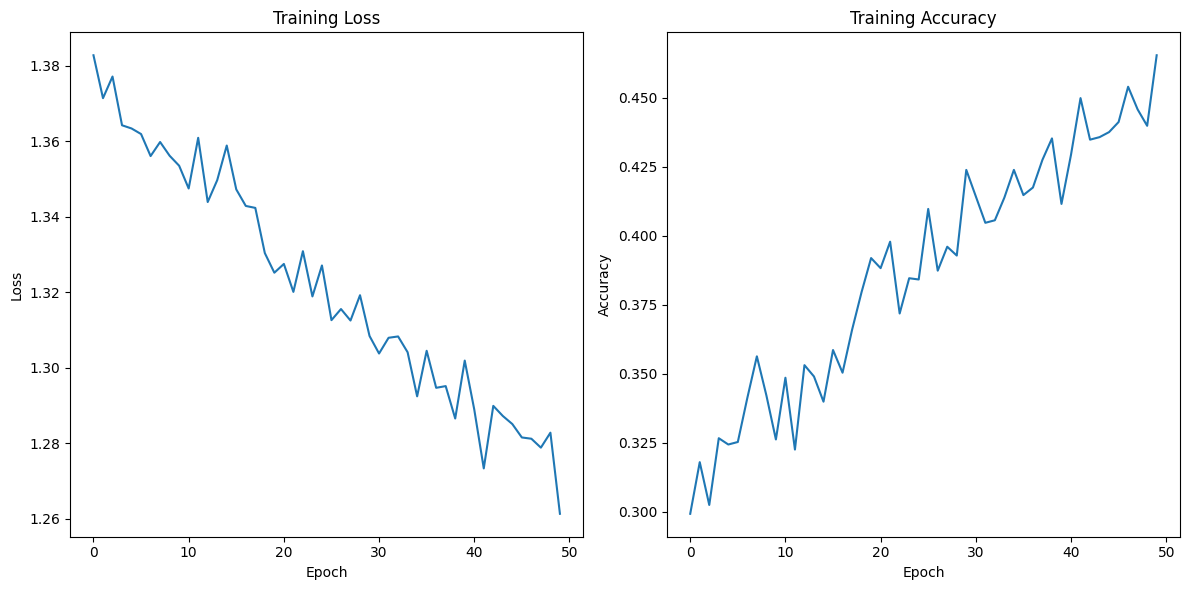

In [41]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [38]:
X_val.shape

(548, 11)

In [19]:
y_hat=model.predict(X_val)

18/18 [==============================] - 0s 1ms/step


In [20]:
a = np.array(42)

In [21]:
y_hat

array([[0.26691207, 0.24199475, 0.25587064, 0.23522249],
       [0.2653507 , 0.25063372, 0.24936774, 0.23464778],
       [0.2906309 , 0.2291586 , 0.25392282, 0.22628766],
       ...,
       [0.28338757, 0.23880027, 0.25509796, 0.2227142 ],
       [0.27796435, 0.22852962, 0.24616025, 0.24734575],
       [0.27208328, 0.24071302, 0.24582763, 0.24137615]], dtype=float32)

In [22]:
a=y_hat

In [23]:
a_updated = []

for row in a:
    h = 0
    for j in range(1, len(row)):
        if row[j] > row[h]:
            h = j
    a_updated.append(h)

a_updated = np.array(a_updated)

print(a_updated)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [24]:
a

array([[0.26691207, 0.24199475, 0.25587064, 0.23522249],
       [0.2653507 , 0.25063372, 0.24936774, 0.23464778],
       [0.2906309 , 0.2291586 , 0.25392282, 0.22628766],
       ...,
       [0.28338757, 0.23880027, 0.25509796, 0.2227142 ],
       [0.27796435, 0.22852962, 0.24616025, 0.24734575],
       [0.27208328, 0.24071302, 0.24582763, 0.24137615]], dtype=float32)

In [25]:
Y_val

2565    1.0
12      3.0
2539    0.0
2644    2.0
2408    0.0
       ... 
2404    1.0
2286    1.0
2196    0.0
2749    0.0
2592    0.0
Name: Lowest distortion, Length: 548, dtype: float64

In [26]:
from sklearn.metrics import f1_score

In [27]:
result=accuracy_score(a_updated,Y_val)

In [28]:
result


0.5875912408759124

In [29]:
y_hat=model.predict(X_test)

22/22 [==============================] - 0s 967us/step


In [30]:
a = np.array(42)

In [31]:
a=y_hat
a_updated = []

for row in a:
    h = 0
    for j in range(1, len(row)):
        if row[j] > row[h]:
            h = j
    a_updated.append(h)

a_updated = np.array(a_updated)

print(a_updated)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [32]:
accuracy_score(a_updated,Y_test)

0.6472303206997084